In [1]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [2]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# 1

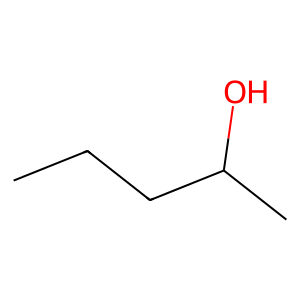

In [3]:
name1 = "CCCC(C)O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

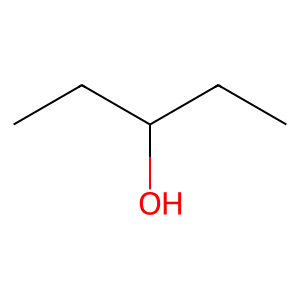

In [4]:
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [5]:
data = {
  "SMILE": [name1, name2]
}
TEST_X = pd.DataFrame(data)
TEST_X

,SMILE
0,CCCC(C)O
1,CCC(CC)O


In [6]:
Mol_descriptors,desc_names = RDkit_descriptors(TEST_X["SMILE"])
TEST_X_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
TEST_X_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.333333,-3.765625,7.333333,3.521250,0.536832,88.15,76.054,88.088815,38,0,...,0,0,0,0,0,0,0,0,0,0
1,7.406250,-3.739583,7.406250,3.533333,0.536832,88.15,76.054,88.088815,38,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test = TEST_X_with_200_descriptors.diff()[1:]
zero_mask = test.eq(0)
zero_mask2=test.drop(columns=zero_mask.columns[(zero_mask == True).any()])
zero_mask3=TEST_X_with_200_descriptors[zero_mask2.columns]
zero_mask3

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,Kappa3,LabuteASA,PEOE_VSA6,PEOE_VSA7,SMR_VSA5,EState_VSA1,VSA_EState1,VSA_EState3,VSA_EState7,VSA_EState8
0,7.333333,-3.765625,7.333333,3.521250,0.210431,-0.393419,0.393419,0.210431,2.500000,3.500000,...,3.960000,55.939569,13.224817,13.224817,32.529652,32.529652,84.396042,3.537708,-11.117708,-7.066042
1,7.406250,-3.739583,7.406250,3.533333,0.210444,-0.393153,0.393153,0.210444,2.166667,2.833333,...,2.212525,55.939569,13.703784,12.745850,32.529652,32.529652,84.378750,3.567083,-11.129167,-7.066667


In [8]:
name_csv = name1+" + "+name2+".csv"
zero_mask3.to_csv(name_csv, index=False)

# 2

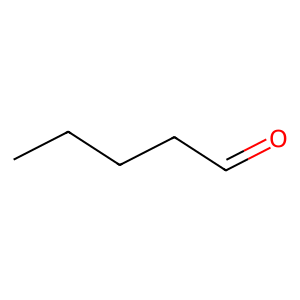

In [9]:
name1 = "CCCCC=O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

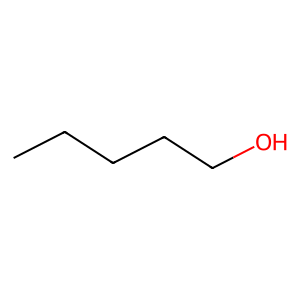

In [10]:
name2 = "CCCCCO"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [11]:
data = {
  "SMILE": [name1, name2]
}
TEST_X = pd.DataFrame(data)
TEST_X

,SMILE
0,CCCCC=O
1,CCCCCO


In [12]:
Mol_descriptors,desc_names = RDkit_descriptors(TEST_X["SMILE"])
TEST_X_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
TEST_X_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.587102,-3.634838,10.587102,2.008681,0.374279,86.134,76.054,86.073165,36,0,...,0,0,0,0,0,0,0,0,0,0
1,7.299583,-3.754167,7.299583,3.414622,0.513281,88.150,76.054,88.088815,38,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test = TEST_X_with_200_descriptors.diff()[1:]
zero_mask = test.eq(0)
zero_mask2=test.drop(columns=zero_mask.columns[(zero_mask == True).any()])
zero_mask3=TEST_X_with_200_descriptors[zero_mask2.columns]
zero_mask3

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,...,FractionCSP3,NHOHCount,NumHDonors,NumRotatableBonds,MolLogP,MolMR,fr_Al_OH,fr_C_O,fr_C_O_noCOO,fr_aldehyde
0,10.587102,-3.634838,10.587102,2.008681,0.374279,86.134,86.073165,36,0.119490,-0.303403,...,0.8,0,0,4,1.3755,25.5890,0,1,1,1
1,7.299583,-3.754167,7.299583,3.414622,0.513281,88.150,88.088815,38,0.210037,-0.396377,...,1.0,1,1,5,1.1689,26.6108,1,0,0,0


In [14]:
name_csv = name1+" + "+name2+".csv"
zero_mask3.to_csv(name_csv, index=False)